In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [4]:
data = pd.read_csv('immobilier au maroc DATA.csv')
data = data.drop('Unnamed: 0', axis=1)

data.head()

,new_price,desc,address,chambres,salles de bains,surface,ascenseur,floor,terrasse,parking,Type,City,Nighberd
0,1000000,Appartement traversant de 98 m² au cœur du Bel...,Appartement à vendre Casablanca - Belvédère,2,1,98,Yes,5,Yes,No,Appartement,Casablanca,Belvédère
1,1750000,Bureau à vendre de 173 m² à Casablanca – Votre...,Bureau à vendre Casablanca - Autre,1,2,173,Yes,7,Yes,No,Bureau,Casablanca,Autre
2,2600000,"Découvrez votre futur chez-vous à Mandarona, C...",Appartement à vendre Casablanca - Californie,3,2,150,Yes,3,Yes,Yes,Appartement,Casablanca,Californie
3,2290000,À vendre – Appartement lumineux de 130 m² enti...,Appartement à vendre Casablanca - Les Hôpitaux,2,1,130,Yes,3,No,No,Appartement,Casablanca,Les Hôpitaux
4,1460000,Bienvenue dans ce charmant appartement situé d...,Appartement à vendre Meknès - Hamria,3,2,163,Yes,2,No,No,Appartement,Meknès,Hamria


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   new_price        4675 non-null   int64 
 1   desc             4675 non-null   object
 2   address          4675 non-null   object
 3   chambres         4675 non-null   int64 
 4   salles de bains  4675 non-null   int64 
 5   surface          4675 non-null   int64 
 6   ascenseur        4675 non-null   object
 7   floor            4675 non-null   int64 
 8   terrasse         4675 non-null   object
 9   parking          4675 non-null   object
 10  Type             4675 non-null   object
 11  City             4675 non-null   object
 12  Nighberd         4675 non-null   object
dtypes: int64(5), object(8)
memory usage: 474.9+ KB


In [6]:
data.describe()

,new_price,chambres,salles de bains,surface,floor
count,4.675000e+03,4675.00000,4675.000000,4675.000000,4675.000000
mean,1.871291e+06,2.32000,1.680000,143.720000,3.200000
std,1.348472e+06,1.91269,0.835314,158.579131,1.385789
min,6.770260e+05,1.00000,1.000000,32.000000,1.000000
25%,1.000000e+06,1.00000,1.000000,50.000000,3.000000
50%,1.460000e+06,2.00000,1.000000,83.000000,3.000000
75%,1.794000e+06,3.00000,2.000000,150.000000,4.000000
max,6.800000e+06,10.00000,4.000000,720.000000,7.000000


### Dop the address and description columns because we don't need them

In [11]:
data = data.drop(['desc', 'address'], axis=1)
data.head()

,new_price,chambres,salles de bains,surface,ascenseur,floor,terrasse,parking,Type,City,Nighberd
0,1000000,2,1,98,Yes,5,Yes,No,Appartement,Casablanca,Belvédère
1,1750000,1,2,173,Yes,7,Yes,No,Bureau,Casablanca,Autre
2,2600000,3,2,150,Yes,3,Yes,Yes,Appartement,Casablanca,Californie
3,2290000,2,1,130,Yes,3,No,No,Appartement,Casablanca,Les Hôpitaux
4,1460000,3,2,163,Yes,2,No,No,Appartement,Meknès,Hamria


### Check for NaN values

In [14]:
data.isnull().sum()

new_price          0
chambres           0
salles de bains    0
surface            0
ascenseur          0
floor              0
terrasse           0
parking            0
Type               0
City               0
Nighberd           0
dtype: int64

### Price Distribution by City :

In [17]:
sns.set_style('darkgrid')

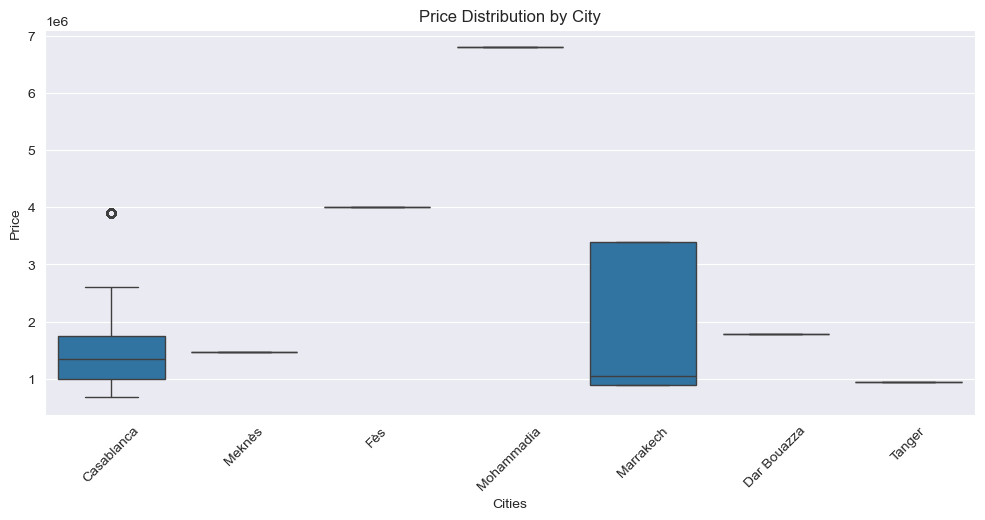

In [21]:
plt.figure(figsize=(12,5))

sns.boxplot(x="City", y="new_price", data=data)

plt.title("Price Distribution by City")
plt.xlabel("Cities")
plt.ylabel("Price")
plt.xticks(rotation=45);

plt.savefig('price_vs_city.png', dpi=300, bbox_inches='tight')

- Casablanca and Marrakech represent the two cities with the most sell announcments in the data with an average price between 500K and 3,5M DH

### Price Distribution by Surface :

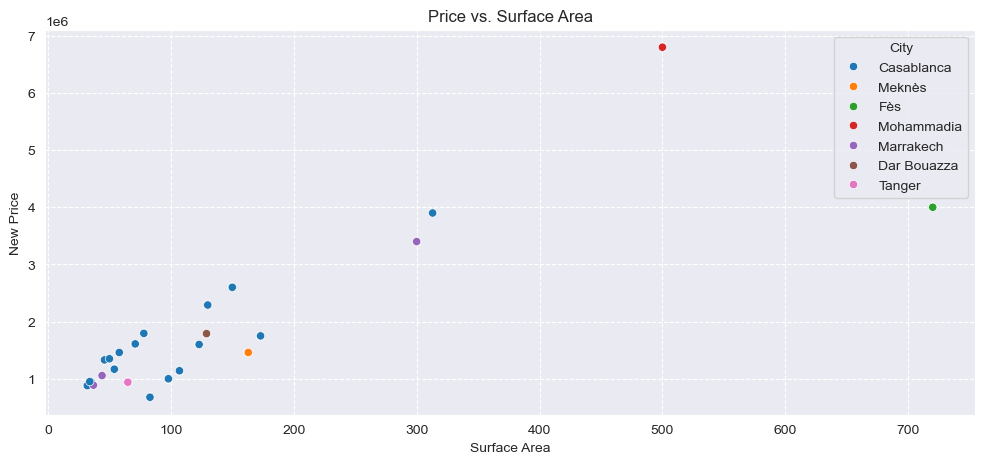

In [25]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x='surface', y='new_price', hue= 'City', data=data)
plt.title('Price vs. Surface Area')
plt.xlabel('Surface Area')
plt.ylabel('New Price')
plt.grid(True, linestyle='--');

plt.savefig('price_vs_surface.png', dpi=300, bbox_inches='tight')

### Distribution of Key Features :

- For chambres

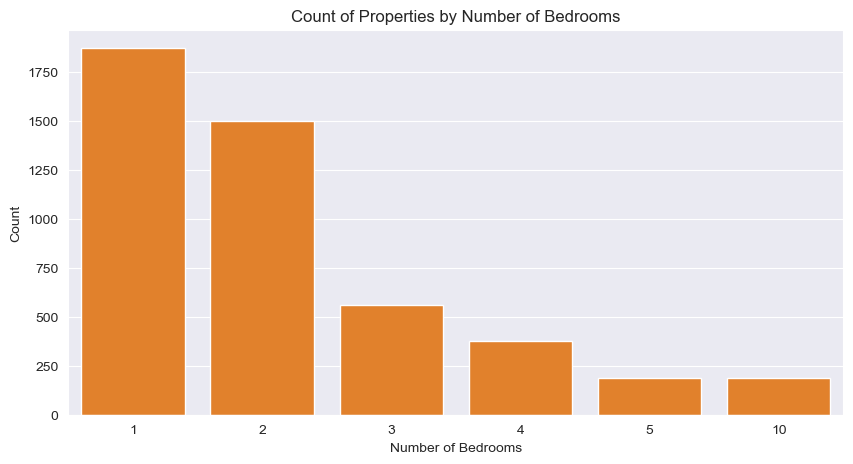

In [31]:
plt.figure(figsize=(10, 5))

sns.countplot(x='chambres', data=data, color='C1')
plt.title('Count of Properties by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count');

plt.savefig('Properties_vs_Beed.png')

- For Salles de bains

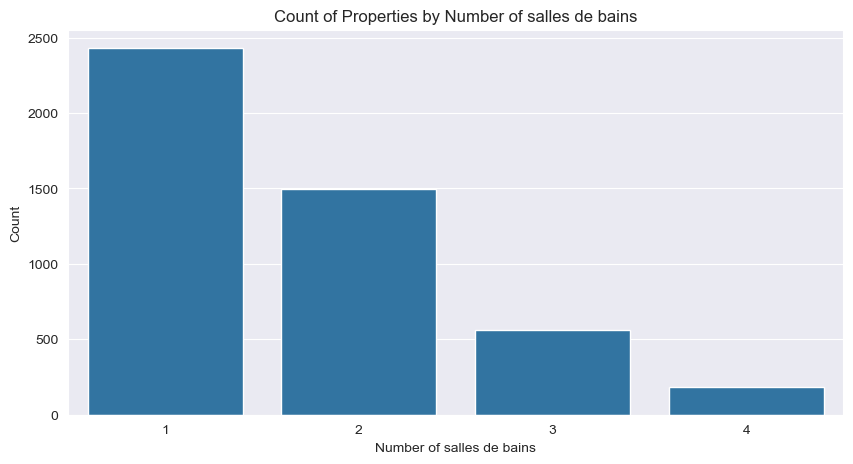

In [34]:
plt.figure(figsize=(10, 5))

sns.countplot(x='salles de bains', data=data, color='C0')
plt.title('Count of Properties by Number of salles de bains')
plt.xlabel('Number of salles de bains')
plt.ylabel('Count');

plt.savefig('Properties_vs_Salles_de_bains.png', dpi=300, bbox_inches='tight')

- Price vs Floor

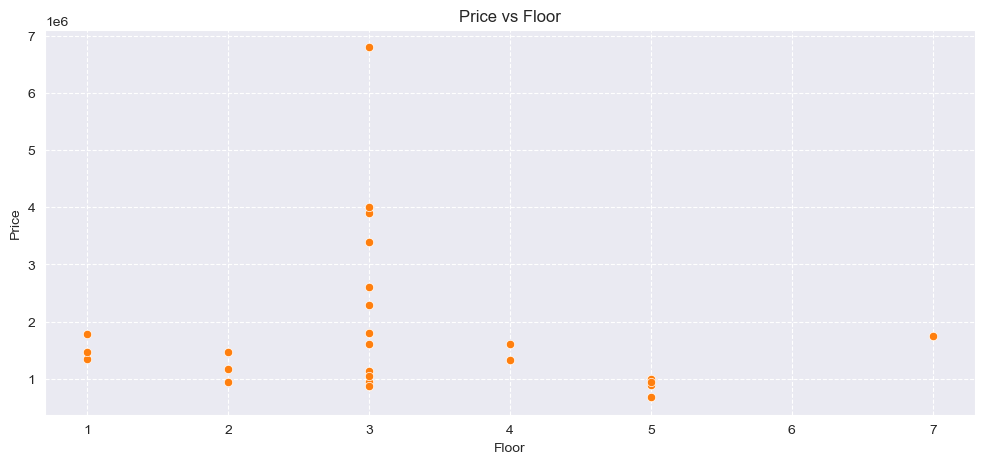

In [40]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x='floor', y='new_price', data=data, color= 'C1')
plt.title('Price vs Floor')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.grid(True, linestyle='--');

plt.savefig('price_vs_floor.png', dpi=300, bbox_inches='tight')

### Prepare Data for for machine learning

- Convert binary categorical columns to 0 and 1

In [44]:
binary_cols = ['ascenseur', 'terrasse', 'parking']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [46]:
data.head()

,new_price,chambres,salles de bains,surface,ascenseur,floor,terrasse,parking,Type,City,Nighberd
0,1000000,2,1,98,1,5,1,0,Appartement,Casablanca,Belvédère
1,1750000,1,2,173,1,7,1,0,Bureau,Casablanca,Autre
2,2600000,3,2,150,1,3,1,1,Appartement,Casablanca,Californie
3,2290000,2,1,130,1,3,0,0,Appartement,Casablanca,Les Hôpitaux
4,1460000,3,2,163,1,2,0,0,Appartement,Meknès,Hamria


- One-Hot Encoding for 'City' and 'Type'

In [49]:
data_encoded = pd.get_dummies(data, columns=['City', 'Type'], drop_first=True, dtype=int)

In [51]:
data_encoded.head()

,new_price,chambres,salles de bains,surface,ascenseur,floor,terrasse,parking,Nighberd,City_Dar Bouazza,City_Fès,City_Marrakech,City_Meknès,City_Mohammadia,City_Tanger,Type_Bureau,Type_Studio,Type_Villa
0,1000000,2,1,98,1,5,1,0,Belvédère,0,0,0,0,0,0,0,0,0
1,1750000,1,2,173,1,7,1,0,Autre,0,0,0,0,0,0,1,0,0
2,2600000,3,2,150,1,3,1,1,Californie,0,0,0,0,0,0,0,0,0
3,2290000,2,1,130,1,3,0,0,Les Hôpitaux,0,0,0,0,0,0,0,0,0
4,1460000,3,2,163,1,2,0,0,Hamria,0,0,0,1,0,0,0,0,0


- use Label Encoding for 'use Label Encoding'

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded['Nighberd'] = le.fit_transform(data['Nighberd'])

In [55]:
data_encoded.head()

,new_price,chambres,salles de bains,surface,ascenseur,floor,terrasse,parking,Nighberd,City_Dar Bouazza,City_Fès,City_Marrakech,City_Meknès,City_Mohammadia,City_Tanger,Type_Bureau,Type_Studio,Type_Villa
0,1000000,2,1,98,1,5,1,0,4,0,0,0,0,0,0,0,0,0
1,1750000,1,2,173,1,7,1,0,3,0,0,0,0,0,0,1,0,0
2,2600000,3,2,150,1,3,1,1,7,0,0,0,0,0,0,0,0,0
3,2290000,2,1,130,1,3,0,0,13,0,0,0,0,0,0,0,0,0
4,1460000,3,2,163,1,2,0,0,12,0,0,0,1,0,0,0,0,0


- Split Data into Features and Target

In [59]:
X = data_encoded.drop('new_price', axis=1)
y = data_encoded['new_price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (4675, 17)
Target shape: (4675,)


- Train-Test Split

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 3740
Testing samples: 935


- Feature Scaling

Since features like surface and chambres have very different ranges, scaling helps models like Linear Regression or SVR perform better.

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Initialize and Train Multiple Models

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained successfully.")

Linear Regression trained successfully.
Gradient Boosting trained successfully.


- Model Evaluation

In [72]:
from sklearn.metrics import mean_absolute_error, r2_score

results = []

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results.append({"Model": name, "MAE": mae, "R2 Score": r2})

results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
results_df

,Model,MAE,R2 Score
1,Gradient Boosting,8080.871681,0.999928
0,Linear Regression,108616.783391,0.988462


### Visualizing Predictions

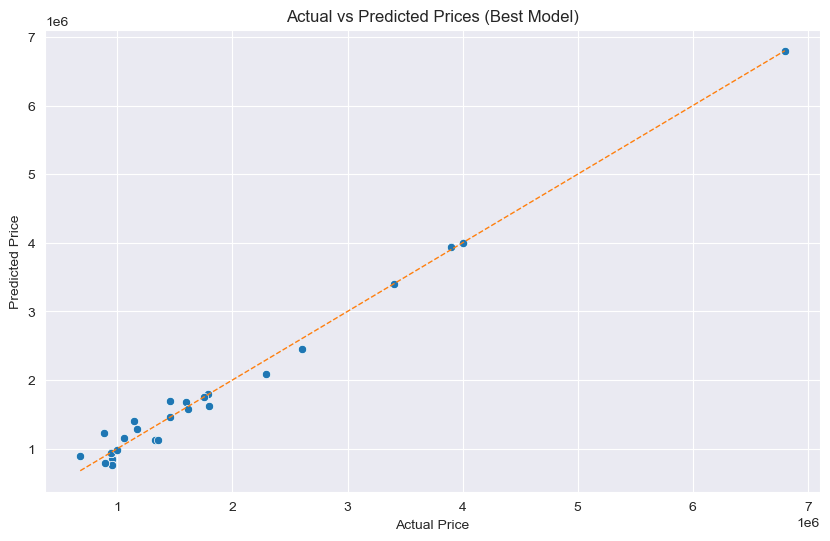

<Figure size 640x480 with 0 Axes>

In [85]:
best_model = models["Linear Regression"]
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--C1', linewidth=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Best Model)')
plt.show();

plt.savefig('Actual_vs_Predicted_Prices.png', dpi=300, bbox_inches='tight')